# House Prices
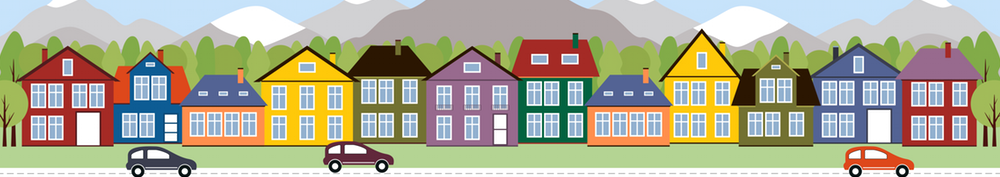
Fonte de dados: Kaggle
<br>
Objetivo: Prever o preço de venda de cada casa a partir da análise de 79 variáveis utilizando uma base de treino e outra de teste 

# Explorando os dados

In [1]:
#importando o pandas
import pandas as pd

In [2]:
#importando o dataset de treino
treino = pd.read_csv('train.csv')

In [3]:
#visualizando o dataset treino
treino.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
#Identificando número de linhas e colunas do dataset treino
treino.shape

(1460, 81)

In [5]:
#Informações do dataset
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Limpando dos dados

In [6]:
#Quantidade de valores vazios
treino.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [7]:
#% de valores vazios
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [8]:
#Identificando as colunas com valores vazios acima de 10%
treino.columns[(treino.isnull().sum()/treino.shape[0]) > 0.1]

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
#Eliminando as colunas com valores vazios acima de 10%
eliminar = treino.columns[(treino.isnull().sum()/treino.shape[0]) > 0.1]
treino = treino.drop(eliminar,axis=1)

In [10]:
#Verificando o novo dataset com as colunas eliminadas
treino.shape

(1460, 75)

In [11]:
#Identificando o tipo de cada coluna
treino.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 75, dtype: object

In [12]:
#Identificando as colunas numpericas
treino.dtypes != 'object'

Id                True
MSSubClass        True
MSZoning         False
LotArea           True
Street           False
                 ...  
MoSold            True
YrSold            True
SaleType         False
SaleCondition    False
SalePrice         True
Length: 75, dtype: bool

In [13]:
#Filtrando as colunas numéricas
colunas = treino.columns[treino.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
#Criando a nova base apenas com as colunas numéricas
treino2 = treino.loc[:,colunas]
treino2

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [15]:
#Verificando se há valores vazios
treino2.isnull().sum().sort_values(ascending=False)


GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
EnclosedPorch     0
HalfBath          0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
BedroomAbvGr      0
FullBath          0
MSSubClass        0
BsmtFinSF2        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtUnfSF         0
BsmtHalfBath      0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
SalePrice         0
dtype: int64

In [16]:
#Tratando valores vazios (nesse caso substituí por -1)
treino2 = treino2.fillna(-1)

# Criando o modelo de previsão

In [17]:
#Selecionando X e Y (tirando a coluna que queremos prever SalePrice)
x = treino2.drop('SalePrice',axis=1)
y = treino2.SalePrice

In [18]:
#Importanto o train_test_split
from sklearn.model_selection import train_test_split

In [19]:
#Separando a base em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42 )

In [20]:
#Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [21]:
#Criando o regressor linear e fazendo o fit com os dados de treino
reg = LinearRegression().fit(x_train,y_train)

In [22]:
#Agora fazendo a previsão para os dados da base teste
y_rl = reg.predict(x_test)

In [24]:
#Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [25]:
#Importando o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [26]:
#Avaliando o erro absoluto médio do modelo adotado (regressão linear)
print(mean_absolute_error(y_test,y_rl))

23763.18739306386


In [27]:
#Avaliando o erro quadrático médio do modelo adotado (regressão linear)
print(mean_squared_error(y_test,y_rl))

1533982883.4448688


# Fazendo a previsão para a base teste

In [28]:
#Importando a base de teste
teste = pd.read_csv('test.csv')

In [29]:
#Visualizando a base
teste.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [30]:
#Identificando número de linhas e colunas do dataset teste
teste.shape

(1459, 80)

In [31]:
#Fazendo os mesmos tratamentos feitos na base de treino
teste = teste.drop(eliminar, axis=1)

In [32]:
#Identificando as colunas numericas
teste.dtypes != 'object'

Id                True
MSSubClass        True
MSZoning         False
LotArea           True
Street           False
                 ...  
MiscVal           True
MoSold            True
YrSold            True
SaleType         False
SaleCondition    False
Length: 74, dtype: bool

In [35]:
#Identificando as colunas numéricas
colunas2 = teste.columns[teste.dtypes != 'object']
colunas2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [36]:
#Filtrando as colunas numéricas
teste = teste.loc[:,colunas2]

In [38]:
#Verificando a quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False)

GarageYrBlt      78
MasVnrArea       15
BsmtHalfBath      2
BsmtFullBath      2
BsmtUnfSF         1
GarageCars        1
GarageArea        1
BsmtFinSF1        1
BsmtFinSF2        1
TotalBsmtSF       1
OpenPorchSF       0
WoodDeckSF        0
Id                0
EnclosedPorch     0
TotRmsAbvGrd      0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
Fireplaces        0
FullBath          0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
MSSubClass        0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
YearRemodAdd      0
YearBuilt         0
OverallCond       0
OverallQual       0
LotArea           0
YrSold            0
dtype: int64

In [39]:
#Tratando os valores vazios (Substituí o vazio por -1)
teste = teste.fillna(-1)

In [41]:
#Fazendo a previsão com regressão linear
y_pred = reg.predict(teste)

In [42]:
#adicionando essa coluna de previsão na base de dados teste
teste['SalePrice'] = y_pred

In [45]:
#Extraindo o ID e SalePrice
resultado = teste[['Id','SalePrice']]
resultado

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251
3,1464,199138.801656
4,1465,196257.109229
...,...,...
1454,2915,59584.320646
1455,2916,54459.048029
1456,2917,175307.588032
1457,2918,106132.531424


In [48]:
#exportando o resultado no formato .csv sem o index
resultado.to_csv('resultado.csv', index=False , header = 1)